In [1]:
"""
https://www.analyticsvidhya.com/blog/2020/05/tutorial-real-time-lane-detection-opencv/
Ïó¨Í∏∞ ÏÇ¨Ïù¥Ìä∏ ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†ÌñàÏùå.
"""

'\nhttps://www.analyticsvidhya.com/blog/2020/05/tutorial-real-time-lane-detection-opencv/\nÏó¨Í∏∞ ÏÇ¨Ïù¥Ìä∏ ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†ÌñàÏùå.\n'

In [2]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [3]:
"""
Í∞ÅÏ¢Ö Í≤ΩÎ°ú ÏÑ§Ï†ïÌïòÍ∏∞
"""
# Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•Îêú, ÎèÑÎ°ú ÏÇ¨ÏßÑ : ÏûÖÎ†•
dir_path_img_frames_read = 'resource/set1/frames_in/'

# Ïó¨Í∏∞ Íµ¨ÌòÑÎêú ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú Ï∞®ÏÑ† ÌÉêÏßÄÍ∞Ä Îêú ÎèÑÎ°ú ÏÇ¨ÏßÑÏùÑ Ï†ÄÏû•Ìï† Ìè¥Îçî : Ï∂úÎ†•
dir_path_img_frames_write = 'resource/set1/frames1_out-v1/'

# Ï∞®ÏÑ† ÌÉêÏßÄÍ∞Ä Îêú ÎèÑÎ°ú ÏÇ¨ÏßÑÏùÑ ÎèôÏòÅÏÉÅÏúºÎ°ú ÎßåÎì§Ïñ¥ÏÑú Ï†ÄÏû•Ìï† Í≤∞Í≥ºÎ¨º
dir_path_video_out = 'resource/set1/'
video_out_filename = 'set1-output-v1.mp4'

# githubÏóê ÏóÖÎ°úÎìú Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÄÏû•Ìï¥ ÎëêÍ∏∞ ÏúÑÌïú Ìè¥Îçî
dir_important_imgs = 'v1-out-imgs'

print('done')

done


In [4]:
"""
Ï£ºÏöî ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ïÌïòÍ∏∞
"""
target_height = 270  # ÏòÅÏÉÅÏùò Ìè≠
target_width = 480  # ÏòÅÏÉÅÏùò ÎÜíÏù¥

In [5]:
"""
Read Video Frames
ÎπÑÎîîÏò§ : https://www.youtube.com/watch?reload=9&v=KWJaBJYJIjI
Frames : ÎπÑÎîîÏò§ Ï¥¨ÏòÅ ÏòÅÏÉÅÏùÑ Ïó∞ÏÜçÎêú Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÍ≤Ω Ìï¥ ÎÜìÏùÄ Í≤É (ÏÇ¨ÏßÑÌååÏùº Îã§Ïàò)

ÎπÑÎîîÏò§Î•º ÏßÅÏ†ë ÏûÖÎ†•ÏúºÎ°ú Î∞õÏßÄ ÏïäÍ≥†, ÎπÑÎîîÏò§Î•º ÏÇ¨ÏßÑÏúºÎ°ú Î≥ÄÌôòÌïú Îã§ÏùåÏóê
ÏÇ¨ÏßÑ ÌååÏùºÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑÏÑú Ï≤òÎ¶¨ÌïúÎã§.
"""

col_frames = os.listdir(dir_path_img_frames_read)
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# load frames
col_images=[]
for i in tqdm_notebook(col_frames):
    img = cv2.imread(dir_path_img_frames_read + i)
    # Ïù¥ÎØ∏ÏßÄÎ•º Í≥†Ï†ïÎêú ÌÅ¨Í∏∞Î°ú Î≥ÄÍ≤Ω
    # ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Ïò§Îäî Ïù¥ÎØ∏ÏßÄÍ∞Ä, ÎÇ¥Í∞Ä ÏõêÌïòÎäî ÌÅ¨Í∏∞Í∞Ä ÏïÑÎãàÎ©¥, ÎÇ¥Í∞Ä ÏõêÌïòÎäî ÌÅ¨Í∏∞Î°ú Î≥ÄÍ≤Ω
    height, width = img.shape[:2]
    if (height != target_height) or (width != target_width):
        img = img.resize(img, dsize=(target_width, target_height))
        
    col_images.append(img)        

# ÏùΩÏñ¥Ïò® ÏÇ¨ÏßÑ ÌååÏùº Í≤ÄÏ¶ù
num_images = len(col_images)
height, width = col_images[0].shape[:2]
print('num images read : ', num_images)
print('image shape : ', height, width)
print('done')

C:\Users\cjh43\anaconda3\lib\site-packages\ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app



num images read :  1108
image shape :  270 480
done


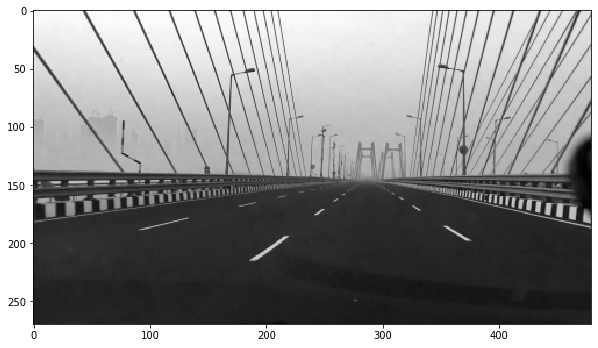

done


In [6]:
# ÏùΩÏñ¥Ïò® ÏÇ¨ÏßÑ Ï§ëÏóêÏÑú ÎûúÎç§ÏúºÎ°ú ÌïòÎÇò Í≥®ÎùºÏÑú ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÍ∏∞

import random
%matplotlib inline

# specify frame index
#idx = random.randint(0, num_images)  # ÎûúÎç§ÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ ÌïòÎÇò Í≥†Î•¥Í∏∞
idx = 1  # 1Î≤à Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ†ÌÉù : Hough Line Tranf ÌñàÏùÑÎïå, Ï∞®ÏÑ† ÏùºÎ∂ÄÎßå ÌÉêÏßÄÎê®
         # v2, v3 ÏóêÏÑú Ïù¥Îü¨Ìïú Î¨∏Ï†úÎ•º Í∞úÏÑ†Ìï† Í≤ÉÏù¥ÎØÄÎ°ú, 1Î≤à Ïù¥ÎØ∏ÏßÄÎ•º ÏòàÏãúÎ°ú ÏÑ†ÌÉù

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(col_images[idx][:,:,0], cmap= "gray")
plt.show()

print('done')

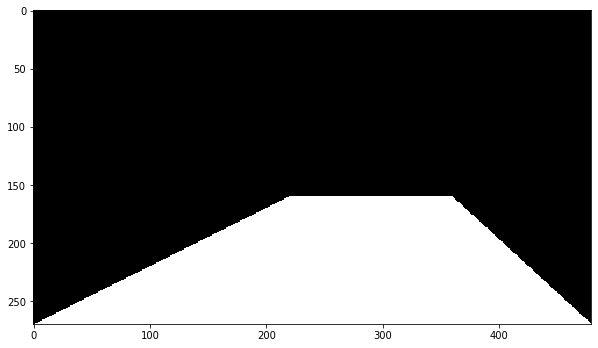

done


In [7]:
"""
Frame Mask Creation : Í¥ÄÏã¨ÏóÜÎäî Î∂ÄÎ∂ÑÏùÄ Í≤ÄÏùÄÏÉâÏúºÎ°ú ÎçÆÏñ¥Î≤ÑÎ¶¨Îäî Î∂ÄÎ∂Ñ
Ï¶â, Î∞îÎ°ú ÏïûÏóê ÏûàÎäî Ï∞®ÏÑ† Î∂ÄÎ∂ÑÏùÑ Ï†úÏô∏ÌïòÍ≥†Îäî Î™®Îëê Í≤ÄÏùÄÏÉâÏúºÎ°ú ÎçÆÏñ¥ÏÑú,
Ï∞®ÏÑ† ÌÉêÏßÄÍ∞Ä Îçî Ïûò ÎêòÎèÑÎ°ù...
=> Ï∞®ÎüâÏóê Îã¨Î¶∞ Ïπ¥Î©îÎùºÎ•º ÌÜµÌï¥ÏÑú Îì§Ïñ¥Ïò§Îäî ÏòÅÏÉÅÏóê Îî∞ÎùºÏÑú maskÎ•º ÏïΩÍ∞Ñ Ï°∞Ï†àÌï† ÌïÑÏöîÍ∞Ä ÏûàÏùÑÎìØ.

Our region of interest is in the shape of a polygon. 
We want to mask everything except this region. 
Therefore, we first have to specify the coordinates of the polygon 
and then use it to prepare the frame mask:
"""

# create a zero array
stencil = np.zeros_like(col_images[idx][:,:,0])

# specify coordinates of the polygon
#
# Ï¥¨ÏòÅÌïú ÏòÅÏÉÅÏóê Îî∞ÎùºÏÑú Îã§Í∞ÅÌòïÏùò ÌòïÌÉúÎ•º Ï°∞Ï†àÌï† ÌïÑÏöîÍ∞Ä ÏûàÍ≤†Îã§.
#
polygon = np.array([[0,270], [220,160], [360,160], [480,270]])

# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)

# Í≤∞Í≥ºÎ•º ÌôîÎ©¥Ïóê ÌëúÏãú : ÏïÑÎ¨¥Í≤ÉÎèÑ ÏóÜÎäî ÌôîÎ©¥Ïóê Îã§Í∞ÅÌòïÏùò Ìù∞ÏÉâ + ÎÇòÎ®∏ÏßÄ Í≤ÄÏùÄÏÉâ ÏÉùÏÑ±
# plot polygon
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

print('done')

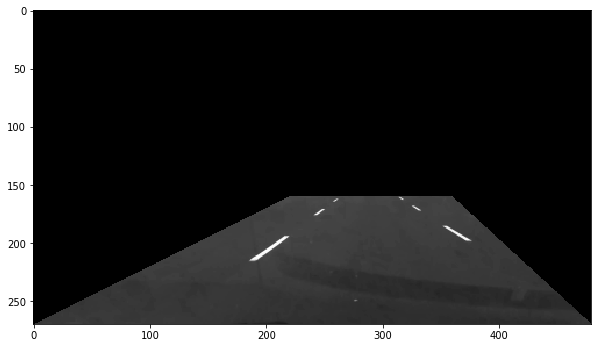

done


In [8]:
# Ïù¥Î†áÍ≤å ÏÉùÏÑ±Ìïú Îã§Í∞ÅÌòïÏùÑ, Ïã§Ï†ú ÎèÑÎ°ú ÏÇ¨ÏßÑ ÏúÑÏóê ÎçÆÍ∏∞
# apply polygon as a mask on the frame
img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

print('done')

In [9]:
"""
Îã§Ïùå ÏûëÏóÖÏùÄ Image pre-processing (Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ï)
ÏõêÌïòÎäî Ï∞®ÏÑ†ÏùÑ Í∞êÏßÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÑ Îëê Î≤à Í±∞Ï≥êÏïº Ìï®

Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§:
1) Image Thresholding
2) Hough Line Transformation
"""

'\nÎã§Ïùå ÏûëÏóÖÏùÄ Image pre-processing (Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ï)\nÏõêÌïòÎäî Ï∞®ÏÑ†ÏùÑ Í∞êÏßÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÑ Îëê Î≤à Í±∞Ï≥êÏïº Ìï®\n\nÏ†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§:\n1) Image Thresholding\n2) Hough Line Transformation\n'

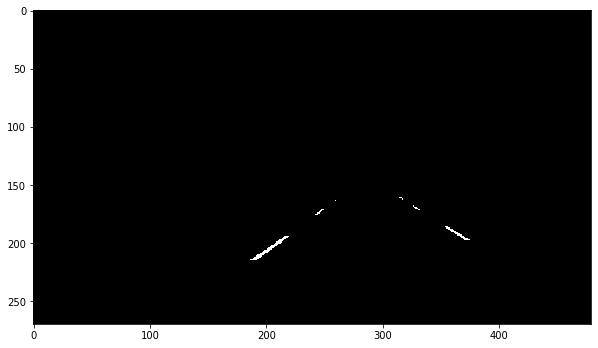

done


In [10]:
"""
1. Image Thresholding
Ïπ¥Î©îÎùºÎ°ú ÌöçÎìùÌïú ÏÇ¨ÏßÑÏùÑ gray-scaleÎ°ú Î≥ÄÌôòÌïú Îã§ÏùåÏóê threshold Í∏∞Î∞òÏùò Î≥ÄÌôò Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©Ìï®
Ï¶â, [Ïù¥ÎØ∏ÏßÄ ÌîΩÏÖÄÍ∞í >= threshold] Ïù¥Î©¥ ÌïúÍ∞ÄÏßÄ ÏÉâÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†
ÎÇòÎ®∏ÏßÄ Í≤ΩÏö∞ÏóêÎäî Îã§Î•∏ ÏÉâÏúºÎ°ú Î≥ÄÌôòÌï¥ÏÑú, 
Ïù¥ÎØ∏ÏßÄÎ•º Îã®ÏàúÌôî ÌïòÍ≥†, Ï∞®ÏÑ† ÌÉêÏßÄÎ•º ÏâΩÍ≤å ÎßåÎì§Í∏∞

-- Î©îÏÜåÎìú ÏÑ§Î™Ö --
cv2.threshold(img, threshold_value, value, flag)

img: Grayscale Ïù¥ÎØ∏ÏßÄ
threshold_value: ÌîΩÏÖÄ Î¨∏ÌÑ±Í∞í
value: ÌîΩÏÖÄ Î¨∏ÌÑ±Í∞íÎ≥¥Îã§ ÌÅ¥ Îïå Ï†ÅÏö©ÎêòÎäî ÏµúÎåÄÍ∞í
flag: Î¨∏ÌÑ± Í∞í Ï†ÅÏö© Î∞©Î≤ï ÎòêÎäî Ïä§ÌÉÄÏùº Í≤∞Ï†ï
    cv2.THRESH_BINARY: ÌîΩÏÖÄ Í∞íÏù¥ threshold_valueÎ≥¥Îã§ ÌÅ¨Î©¥ value, ÏûëÏúºÎ©¥ 0ÏúºÎ°ú Ìï†Îãπ
    cv2.THRESH_BINARY_INV: ÌîΩÏÖÄ Í∞íÏù¥ threshold_valueÎ≥¥Îã§ ÌÅ¨Î©¥ 0, ÏûëÏúºÎ©¥ valueÎ°ú Ìï†Îãπ
    cv2.THRESH_TRUNC: ÌîΩÏÖÄ Í∞íÏù¥ threshold_valueÎ≥¥Îã§ ÌÅ¨Î©¥ threshold_value, ÏûëÏúºÎ©¥ ÌîΩÏÖÄ Í∞í Í∑∏ÎåÄÎ°ú Ìï†Îãπ
    cv2.THRESH_TOERO: ÌîΩÏÖÄ Í∞íÏù¥ threshold_valueÎ≥¥Îã§ ÌÅ¨Î©¥ ÌîΩÏÖÄ Í∞í Í∑∏ÎåÄÎ°ú, ÏûëÏúºÎ©¥ 0ÏúºÎ°ú Ìï†Îãπ
    cv2.THRESH_TOZERO_INV: ÌîΩÏÖÄ Í∞íÏù¥ threshold_valueÎ≥¥Îã§ ÌÅ¨Î©¥ 0, ÏûëÏúºÎ©¥ ÌîΩÏÖÄ Í∞í Í∑∏ÎåÄÎ°ú Ìï†Îãπ
"""

# apply image thresholding
ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)

# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

print('done')

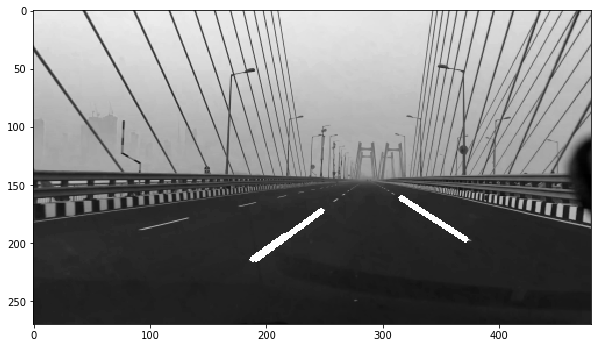

done


In [11]:
"""
2. Hough Line Transformation
Ï∞®ÏÑ† ÌÉêÏßÄ
"""

# https://m.blog.naver.com/windowsub0406/220894462409
# ÌùëÎ∞±ÏúºÎ°ú Î≥ÄÌôòÎêú Ïù¥ÎØ∏ÏßÄÎßå ÏûÖÎ†•ÏúºÎ°ú Î∞õÏùÑ Ïàò ÏûàÏùå
'''
ÌóàÌîÑÎ≥ÄÌôò(cv2.HoughLines)ÏùÄ Î™®Îì† Ï†êÏóê ÎåÄÌï¥ÏÑú Í≥ÑÏÇ∞ÏùÑ ÌïòÍ∏∞ ÎñÑÎ¨∏Ïóê ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ ÏÜåÏöîÎê®. ÌôïÎ•† ÌóàÌîÑ Î≥ÄÌôòÏùÄ ÌóàÌîÑ Î≥ÄÌôòÏùÑ ÏµúÏ†ÅÌôîÌïú Í≤ÉÏù¥Îã§.
Î™®Îì† Ï†êÏùÑ ÎåÄÏÉÅÏúºÎ°ú ÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº ÏûÑÏùòÏùò Ï†êÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏßÅÏÑ†ÏùÑ Ï∞æÎäî Í≤É.

cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)
    image: 8bit, single-channel binary image, canny edgeÎ•º ÏÑ†ÏúºÎ°ú Ï†ÅÏö©Ìï®.
    rho: r Í∞íÏùò Î≤îÏúÑ(0 ~ 1 ÏÇ¨Ïù¥ Ïã§Ïàò).
    theta: ùúÉ Í∞íÏùò Î≤îÏúÑ(0 ~ 180 Ï†ïÏàò).
    threshold: ÎßåÎÇòÎäî Ï†êÏùò Í∏∞Ï§Ä, Ïà´ÏûêÍ∞Ä ÏûëÏúºÎ©¥ ÎßéÏùÄ ÏÑ†Ïù¥ Í≤ÄÏ∂úÎêòÏßÄÎßå Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥ÏßÄÍ≥†, Ïà´ÏûêÍ∞Ä ÌÅ¨Î©¥ Ï†ïÌôïÎèÑÍ∞Ä Ïò¨ÎùºÍ∞ê
    minLineLength: ÏÑ†Ïùò ÏµúÏÜå Í∏∏Ïù¥. Ïù¥ Í∞íÎ≥¥Îã§ ÏûëÏúºÎ©¥ rejectÎê®.
    maxLineGap: ÏÑ†Í≥º ÏÑ† ÏÇ¨Ïù¥Ïùò ÏµúÎåÄ ÌóàÏö© Í∞ÑÍ≤©, Ïù¥ Í∞íÎ≥¥Îã§ ÏûëÏúºÎ©¥ rejectÎê®.

'''
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = col_images[idx][:,:,0].copy()

# draw Hough lines
for line in lines:
    '''
    Hough Line ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÏÑ†ÏùÑ ÌÉêÏßÄÌïúÍ≤ΩÏö∞, ÌÉêÏßÄÌïú ÏÑ†Ïùò ÌïúÏ™Ω ÎÅù (x1,y1) Í≥º Îã§Î•∏Ï™Ω ÎÅù (x2,y2) ÏùÑ Ïïå Ïàò ÏûàÏùå.
    '''
    x1, y1, x2, y2 = line[0]
    cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)  # ÏÇ¨ÏßÑ Î≥µÏÇ¨Î≥∏ ÏúÑÏóê, ÌÉêÏßÄÌïú ÏÑ†ÏùÑ Í∑∏Î†§ÎÑ£Í∏∞

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.savefig(dir_important_imgs + '/detection-result.png', dpi=300)
plt.show()

print('done')

C:\Users\cjh43\anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Type ErrorÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.
Error at INDEX :  968


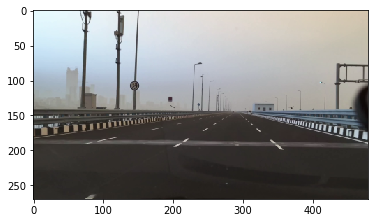

Type ErrorÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.
Error at INDEX :  1089


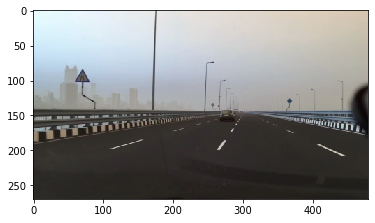

Type ErrorÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.
Error at INDEX :  1090


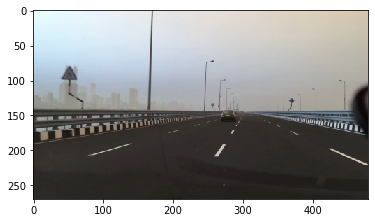

Type ErrorÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.
Error at INDEX :  1095


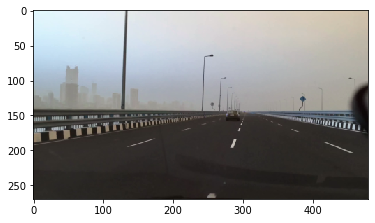

Type ErrorÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.
Error at INDEX :  1096


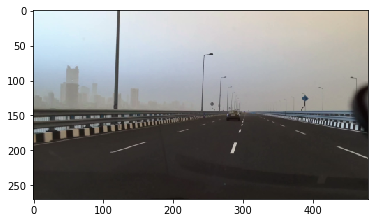


done, processed image count :  1108


In [12]:
"""
ÏúÑÏùò 2Í∞ú Í≥ºÏ†ï (threshold => hough transf) ÏùÑ Î™®Îì† ÏÇ¨ÏßÑ ÌîÑÎ†àÏûÑÏóê Ï†ÅÏö©
"""
cnt = 0

for img in tqdm_notebook(col_images):
    # frame mask Ï†ÅÏö©ÌïòÍ∏∞
    masked = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)
  
    # image thresholding Ï†ÅÏö©ÌïòÍ∏∞
    ret, thresh = cv2.threshold(masked, 130, 145, cv2.THRESH_BINARY)

    # Hough Line Transformation Ï†ÅÏö©ÌïòÍ∏∞
    # HoughLinesP : Probabilistic Hough Transform
    # https://opencv-python.readthedocs.io/en/latest/doc/
    #         25.imageHoughLineTransform/imageHoughLineTransform.html
    lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
    dmy = img.copy()  # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨Î≥∏ ÎßåÎì§Ïñ¥ÏÑú, Í∑∏ ÏúÑÏóêÎã§Í∞Ä ÌÉêÏßÄÌïú ÏÑ†ÏùÑ Í∑∏Î¶¨Í∏∞
  
    # Plot detected lines
    try:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
        cv2.imwrite(dir_path_img_frames_write+str(cnt)+'.png',dmy)  # ÏàòÏ†ïÎ≥∏ Í∑∏Î¶º Ï†ÄÏû•
    except TypeError: 
        cv2.imwrite(dir_path_img_frames_write+str(cnt)+'.png',img)  # ÏõêÎ≥∏ Í∑∏Î¶º Ï†ÄÏû•
        """
        Ïò§Î•òÍ∞Ä Ïñ∏Ï†ú, Ïôú Î∞úÏÉùÌïòÎäîÏßÄ Î∂ÑÏÑùÏù¥ ÏïàÎêòÏÑú, ÏùºÎã®ÏùÄ Í∑∏ÎÉ• Î¨¥ÏãúÌïòÎäî Í≤ÉÏúºÎ°ú...
        """
        print('Type ErrorÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.')
        print('Error at INDEX : ', cnt)
        plt.imshow(dmy)
        plt.show()        
        #assert False, "Type Error Í∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§."

    cnt+= 1

print('done, processed image count : ', cnt)

In [13]:
"""
Ï∞®ÏÑ† ÌÉêÏßÄÎêú Ïù¥ÎØ∏ÏßÄÎ•º Î¨∂Ïñ¥ÏÑú ÎπÑÎîîÏò§Î°ú ÎßåÎì§Í∏∞ (1/3)
"""

# specify frames per second
fps = 30.0

from os.path import isfile, join

# get file names of the frames
files = [f for f in os.listdir(dir_path_img_frames_write) 
         if isfile(join(dir_path_img_frames_write, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))

print('done')

done


In [14]:
# Ï∞®ÏÑ† ÌÉêÏßÄÎêú Ïù¥ÎØ∏ÏßÄÎ•º Î¨∂Ïñ¥ÏÑú ÎπÑÎîîÏò§Î°ú ÎßåÎì§Í∏∞ (2/3)
# Next, we will get all the frames with the detected lane into a list:

frame_list = []

for i in tqdm_notebook(range(len(files))):
    filename = dir_path_img_frames_write + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_list.append(img)
    
print('done')    

C:\Users\cjh43\anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



done


In [15]:
# Ï∞®ÏÑ† ÌÉêÏßÄÎêú Ïù¥ÎØ∏ÏßÄÎ•º Î¨∂Ïñ¥ÏÑú ÎπÑÎîîÏò§Î°ú ÎßåÎì§Í∏∞ (3/3)
# Finally, we can now combine the frames into a video by using the code below:

# write the video
path_out = dir_path_video_out + video_out_filename
'''
ÏòÅÏÉÅÏùÑ Ï†ÄÏû•ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú videowriterÎ•º ÏÇ¨Ïö©Ìï¥Ïïº ÌïúÎã§.
cv2.VideoWriter(outputFile, fourcc, frame, size)
    outputFile(str): Ï†ÄÏû•Îê† ÌååÏùº Ïù¥Î¶Ñ
    fourcc: Codec Ï†ïÎ≥¥. cv2.VideoWriter_fourcc()
        frame(float): Ï¥àÎãπ Ï†ÄÏû•Îê† frame
        size(list): Ï†ÄÏû•Îê† ÏÇ¨Ïù¥Ï¶à(ex; 640 * 480)
'''
out = cv2.VideoWriter(path_out, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_list)):
    # writing to a image array
    out.write(frame_list[i])

out.release()

print('done')

done
